In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.stats import sigma_clipped_stats, SigmaClip
from astropy.io import fits
from astropy.visualization import simple_norm

from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint

In [2]:
f=fits.open('final_94_drz.fits') 
data = f[1].data
#data = np.load("cutout246.npy")

In [3]:
sigma_clip = SigmaClip(sigma=3.0, maxiters=10)
threshold = detect_threshold(data, nsigma=2.0, sigma_clip=sigma_clip)
segment_img = detect_sources(data, threshold, npixels=10)
footprint = circular_footprint(radius=10)
mask = segment_img.make_source_mask(footprint=footprint)
mean, median, std = sigma_clipped_stats(data, sigma=3.0, mask=mask)
print(np.array((mean, median, std)))  

[-0.00169531 -0.00174494  0.00766512]


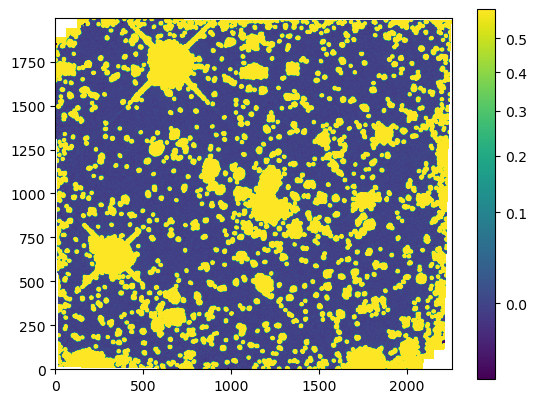

In [4]:
norm = simple_norm(data, 'sqrt', percent=99.)
plt.imshow(data+mask, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()